In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [0]:
x_data = np.linspace(0, 10, 1000000)
noise = np.random.randn(len(x_data))

In [3]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b 

m = 0.5

b = 5


In [0]:
y_true = (0.5 * x_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data = x_data, columns = ["X Data"])
y_df = pd.DataFrame(data = y_true, columns = ["Y"])

In [6]:
y_df.head()

,Y
0,3.600078
1,4.012856
2,4.282041
3,6.548984
4,3.246598


In [0]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [8]:
my_data.head()

,X Data,Y
0,0.00000,3.600078
1,0.00001,4.012856
2,0.00002,4.282041
3,0.00003,6.548984
4,0.00004,3.246598


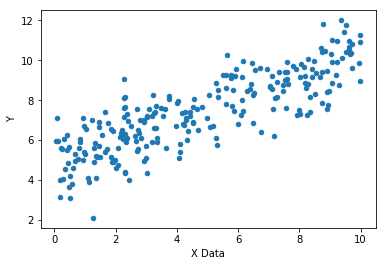

In [9]:
my_data.sample(n = 250).plot(kind = "scatter", x = 'X Data', y = 'Y')

In [0]:
batch_size = 16

In [0]:
m = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [0]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [0]:
y_model = m * xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  batches = 7000
  
  for i in range(batches):
    
    rand_ind = np.random.randint(len(x_data), size = batch_size)
    
    feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
    
    sess.run(train, feed_dict = feed)
  
  model_m, model_b = sess.run([m, b])

In [18]:
model_m

0.5027506

In [19]:
model_b

4.9793973

In [0]:
y_hat = x_data  * model_m + model_b

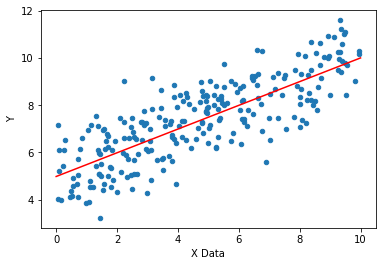

In [21]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(x_data, y_hat, 'r')